<a href="https://colab.research.google.com/github/Giridharan-P05/Giridharan-P05/blob/main/Movies_Boxoffice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:

The movie industry faces significant financial risks and resource allocation challenges due to the lack of an accurate and reliable method for predicting movie success. This results in potential financial losses, missed opportunities for audiences, and inefficient use of resources. Therefore, there is a critical need for a predictive model that can accurately forecast movie success based on key features like budget, opening collection, and ratings, enabling better decision-making and optimizing the film production process.

Linear regression:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Movies_list.csv', encoding  ='latin1')
df.head()

,Movies,Language,Budjet,opening-col,Boxoffice,Rating,Result
0,A.R.M,Malayalam,21.549452,24,148,7.2,Blockbuster
1,Aavesham,Malayalam,47.464463,50,85,7.8,Blockbuster
2,Amaran,Tamil,17.218656,15,183,8.3,Hit
3,Aranmanai 4,Tamil,36.586398,38,89,5.1,Hit
4,Article 370,Hindi,87.288984,87,137,7.8,Hit


<function matplotlib.pyplot.show(close=None, block=None)>

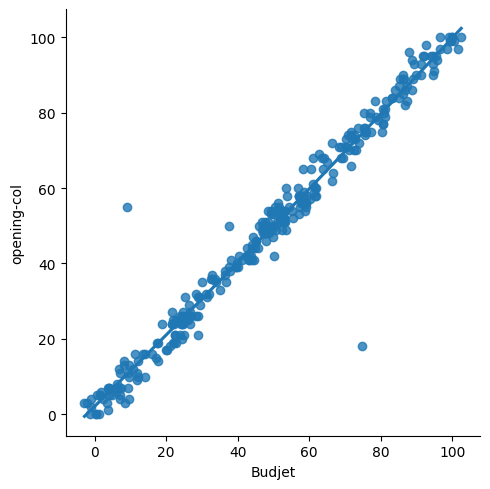

In [ ]:
sns.lmplot(x = "Budjet", y = "opening-col", data = df, order = 2, ci = None)
plt.show

In [ ]:
x = np.array(df['Budjet']).reshape(-1,1)
y = np.array(df['opening-col']).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 16)

regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.9574560965884767


In [ ]:
scores = cross_val_score(regr, x, y, cv=50)
print(scores.mean())

0.8812829162393164


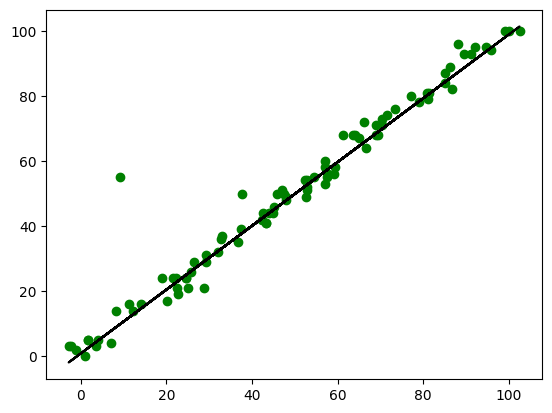

In [ ]:
y_pred = regr.predict(x_test)
plt.scatter(x_test, y_test, color = 'g')
plt.plot(x_test, y_pred, color = 'k')

plt.show()

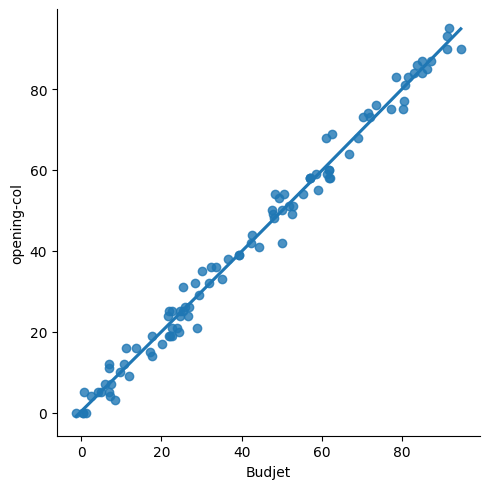

In [ ]:
df_100 = df[:][:100]

sns.lmplot(x = "Budjet", y = "opening-col", data = df_100, order = 2, ci = None)

In [ ]:
x = np.array(df_100['Budjet']).reshape(-1,1)
y = np.array(df_100['opening-col']).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 16)

regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.9877460565655398


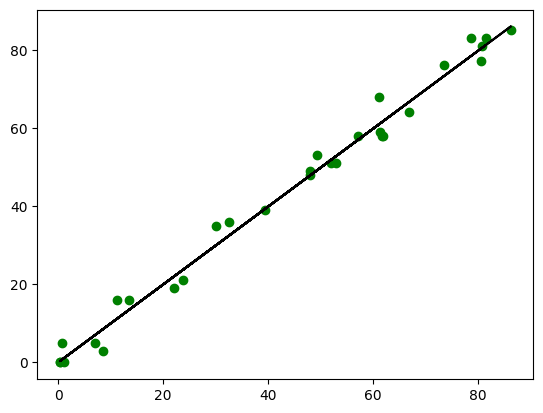

In [ ]:
y_pred = regr.predict(x_test)

plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, y_pred, color='k')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 2.567533577953504
MSE: 9.647679436370238
RMSE: 9.647679436370238


Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
pima = pd.read_csv("Movies_list.csv", encoding = 'latin1')
pima.head()

,Movies,Language,Budjet,opening-col,Boxoffice,Rating,Result
0,A.R.M,Malayalam,21.549452,24,148,7.2,Blockbuster
1,Aavesham,Malayalam,47.464463,50,85,7.8,Blockbuster
2,Amaran,Tamil,17.218656,15,183,8.3,Hit
3,Aranmanai 4,Tamil,36.586398,38,89,5.1,Hit
4,Article 370,Hindi,87.288984,87,137,7.8,Hit


In [ ]:
pima['Rating_Category'] = pima['Rating'].apply(lambda x: 'Good' if x >= 7.0 else 'Average')

feature_cols = ['Budjet','opening-col','Boxoffice']
X = pima[feature_cols]
y = pima.Rating_Category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)

Confusion Matrix:
[[33  4]
 [31  7]]


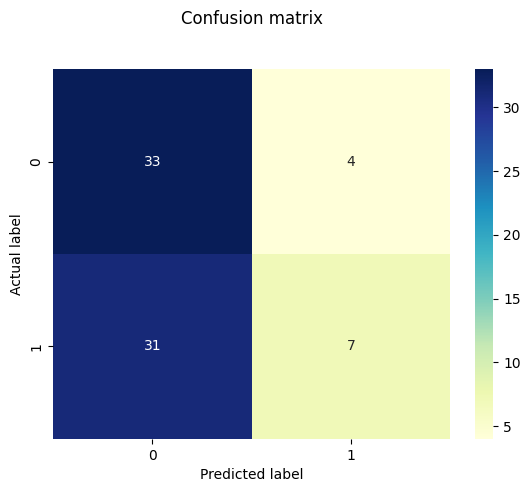

In [ ]:
class_names=['Good','Average']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Good       0.52      0.89      0.65        37
     Average       0.64      0.18      0.29        38

    accuracy                           0.53        75
   macro avg       0.58      0.54      0.47        75
weighted avg       0.58      0.53      0.47        75



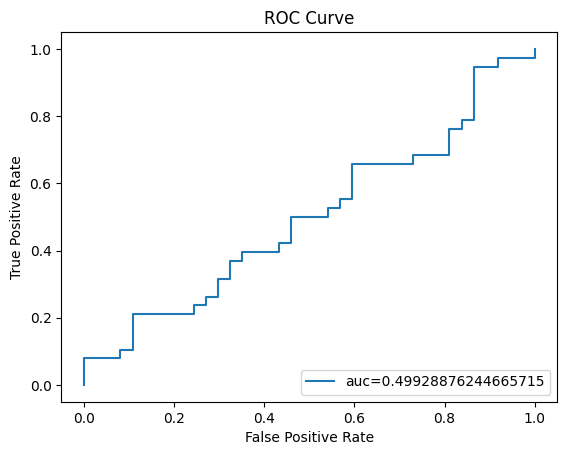

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Good')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

K means

In [ ]:
import pandas as pd
data = pd.read_csv('Movies_list.csv', encoding = 'latin1')
data.head()

,Movies,Language,Budjet,opening-col,Boxoffice,Rating,Result
0,A.R.M,Malayalam,21.549452,24,148,7.2,Blockbuster
1,Aavesham,Malayalam,47.464463,50,85,7.8,Blockbuster
2,Amaran,Tamil,17.218656,15,183,8.3,Hit
3,Aranmanai 4,Tamil,36.586398,38,89,5.1,Hit
4,Article 370,Hindi,87.288984,87,137,7.8,Hit


<Axes: xlabel='Boxoffice', ylabel='opening-col'>

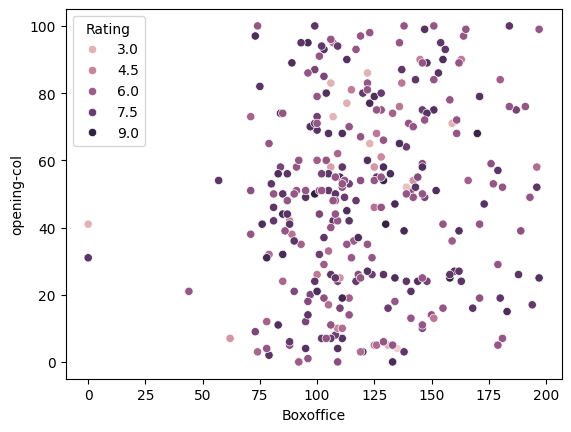

In [ ]:
import seaborn as sns

sns.scatterplot(data = data, x = 'Boxoffice', y = 'opening-col', hue = 'Rating')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Boxoffice','opening-col']], data[['Rating']], test_size=0.33, random_state=0)

In [ ]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    fits.append(model)

    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='Boxoffice', ylabel='opening-col'>

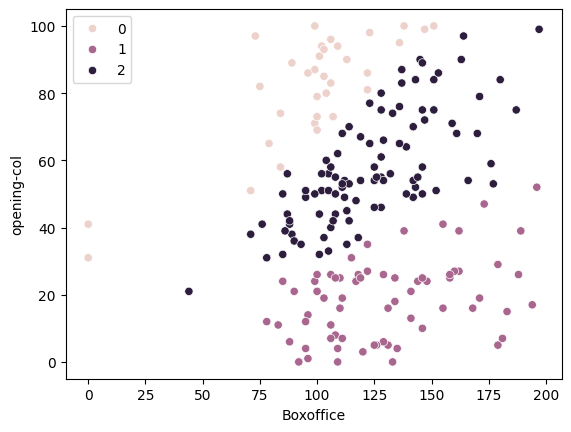

In [ ]:
sns.scatterplot(data = X_train, x = 'Boxoffice', y = 'opening-col', hue = fits[1].labels_)

<Axes: xlabel='Boxoffice', ylabel='opening-col'>

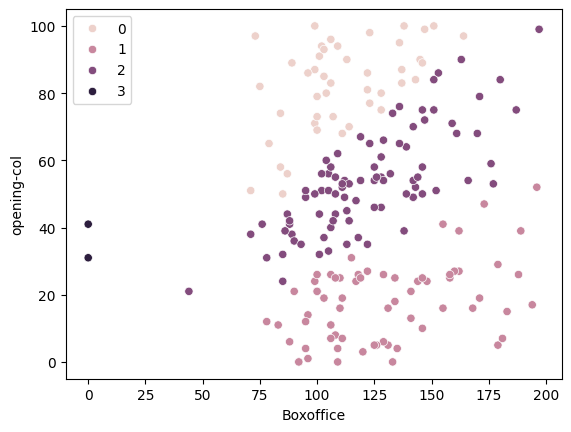

In [ ]:
sns.scatterplot(data = X_train, x = 'Boxoffice', y = 'opening-col', hue = fits[2].labels_)

<Axes: >

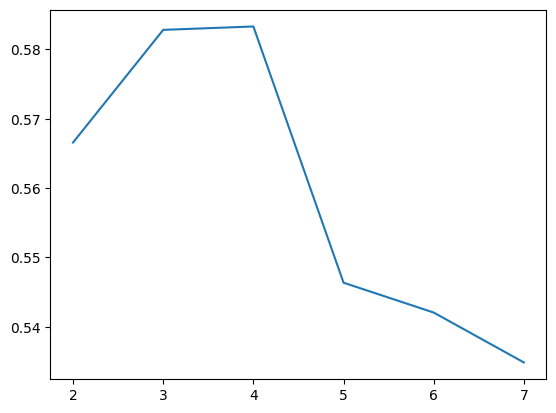

In [ ]:
sns.lineplot(x = K, y = score)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 40, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, random_state=40)

<Axes: xlabel='Boxoffice', ylabel='opening-col'>

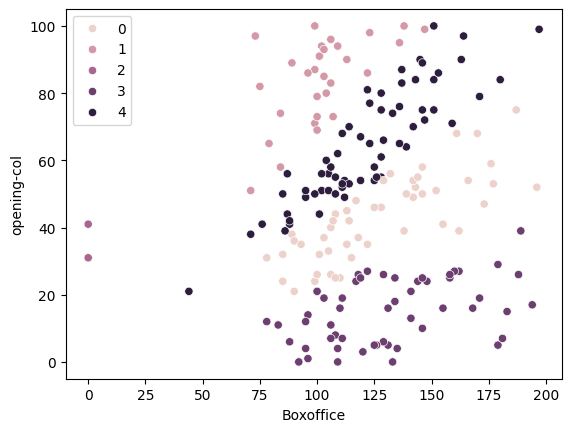

In [ ]:
sns.scatterplot(data = X_train, x = 'Boxoffice',y = 'opening-col', hue = kmeans.labels_)

Naive Bayes:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Movies_list.csv', encoding = 'Latin1')
data.head()

,Movies,Language,Budjet,opening-col,Boxoffice,Rating,Result
0,A.R.M,Malayalam,21.549452,24,148,7.2,Blockbuster
1,Aavesham,Malayalam,47.464463,50,85,7.8,Blockbuster
2,Amaran,Tamil,17.218656,15,183,8.3,Hit
3,Aranmanai 4,Tamil,36.586398,38,89,5.1,Hit
4,Article 370,Hindi,87.288984,87,137,7.8,Hit


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movies       298 non-null    object 
 1   Language     298 non-null    object 
 2   Budjet       298 non-null    float64
 3   opening-col  298 non-null    int64  
 4   Boxoffice    298 non-null    int64  
 5   Rating       298 non-null    float64
 6   Result       298 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 16.4+ KB


In [ ]:
Blockbuster =data[data.Result == 'Blockbuster']
Hit = data[data.Result == 'Hit']

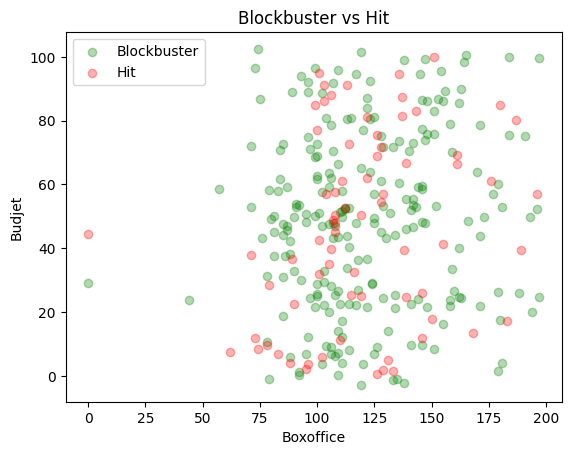

In [ ]:
plt.title("Blockbuster vs Hit")
plt.xlabel("Boxoffice")
plt.ylabel("Budjet")
plt.scatter(Blockbuster["Boxoffice"], Blockbuster["Budjet"], color = 'green', label = 'Blockbuster', alpha = 0.3)
plt.scatter(Hit["Boxoffice"], Hit["Budjet"], color = 'red', label = 'Hit', alpha = 0.3)
plt.legend()
plt.show()
plt.show()

In [ ]:
x = data.drop(["Movies","Language","Result"], axis = 1)
y = data.Result

In [ ]:
import numpy as np
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.7333333333333333


PCA:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Movies_list.csv', encoding = 'latin1')
data.head()

,Movies,Language,Budjet,opening-col,Boxoffice,Rating,Result
0,A.R.M,Malayalam,21.549452,24,148,7.2,Blockbuster
1,Aavesham,Malayalam,47.464463,50,85,7.8,Blockbuster
2,Amaran,Tamil,17.218656,15,183,8.3,Hit
3,Aranmanai 4,Tamil,36.586398,38,89,5.1,Hit
4,Article 370,Hindi,87.288984,87,137,7.8,Hit


In [ ]:
target_names = (data['Result'].unique())
print(target_names)
feature_names = ['Budjet', 'opening-col','Boxoffice','Rating']
print(feature_names)

['Blockbuster' 'Hit']
['Budjet', 'opening-col', 'Boxoffice', 'Rating']


In [ ]:
df1=pd.DataFrame(data ,columns=feature_names)

scaling=StandardScaler()

scaling.fit(df1)
Scaled_data=scaling.transform(df1)

principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

print(x.shape)

(298, 3)


In [ ]:
principal.components_

array([[ 0.6957427 ,  0.69610205,  0.17480619, -0.0287546 ],
       [-0.03879158, -0.03186871,  0.42961001,  0.9016179 ],
       [-0.1213198 , -0.11904486,  0.88592622, -0.43156061]])

<ipython-input-19-0662b809bc07>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1], c=colors, cmap='plasma')


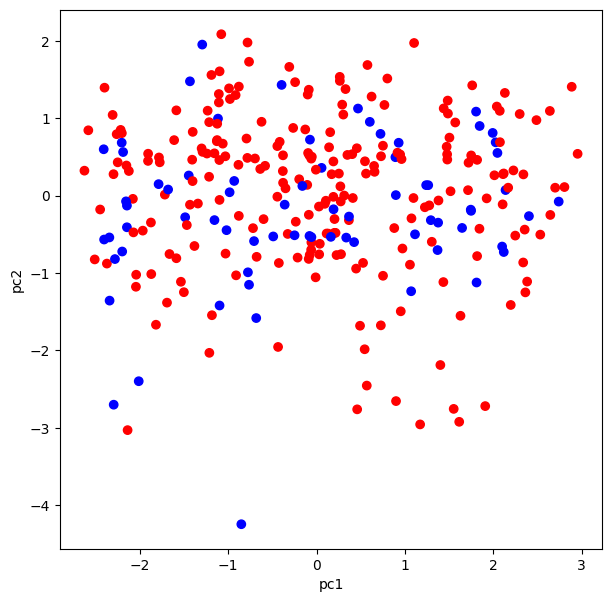

In [ ]:
color_mapping = {'Blockbuster': 'red', 'Hit': 'blue'}

colors = data['Result'].map(color_mapping)

plt.figure(figsize=(7,7))
plt.scatter(x[:, 0], x[:, 1], c=colors, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

<ipython-input-22-c0fe62bd6e60>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(x[:,0],x[:,1],x[:,2], c=colors,cmap='plasma')


Text(0.5, 0, 'PC3')

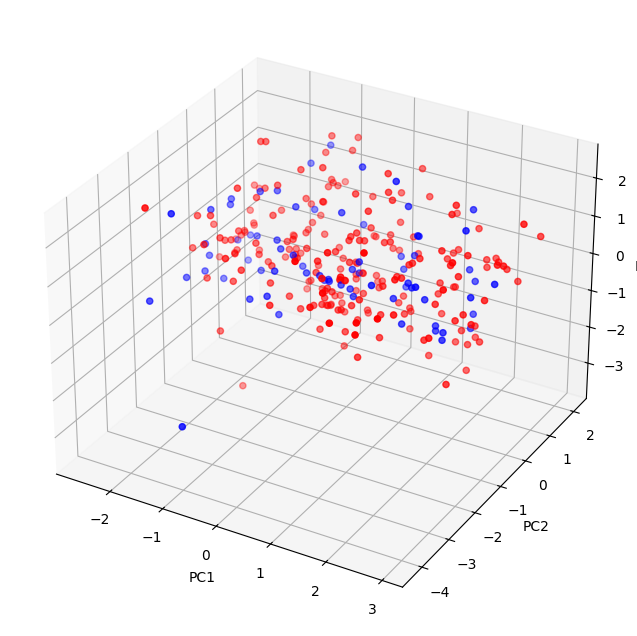

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))

axis = fig.add_subplot(111, projection='3d')

axis.scatter(x[:,0],x[:,1],x[:,2], c=colors,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

Random Forest(for Boxoffice Prediction)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Movies_list.csv', encoding = 'Latin1')
df.head()

,Movies,Language,Budjet,opening-col,Boxoffice,Rating,Result
0,A.R.M,Malayalam,21.549452,24,148,7.2,Blockbuster
1,Aavesham,Malayalam,47.464463,50,85,7.8,Blockbuster
2,Amaran,Tamil,17.218656,15,183,8.3,Hit
3,Aranmanai 4,Tamil,36.586398,38,89,5.1,Hit
4,Article 370,Hindi,87.288984,87,137,7.8,Hit


In [ ]:
x = df.drop(['Movies', 'Language','Result'], axis=1)
y = df['Boxoffice']

x.shape, y.shape

((298, 4), (298,))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 32)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((238, 4), (238,), (60, 4), (60,))

In [ ]:
 from sklearn.ensemble import RandomForestRegressor
 rf_1 = RandomForestRegressor()
 rf_1.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
 y_pred_train = rf_1.predict(x_train)

 from sklearn.metrics import mean_squared_error
 rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
 print('RMSE on Training data{}', format(rmse_train))

RMSE on Training data{} 1.1574348630419224


In [ ]:
y_pred_test = rf_1.predict(x_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on Testing data{}', format(rmse_test))

RMSE on Testing data{} 0.8775458202661948


In [ ]:
 from sklearn.metrics import r2_score
 y_pred_train = rf_1.predict(x_train)
 print('Training score:{}'.format(r2_score(y_train, y_pred_train)))

Training score:0.9988703867354254


In [ ]:
y_pred_test = rf_1.predict(x_test)
print('Testing score:{}'.format(r2_score(y_test, y_pred_test)))

Testing score:0.999036583467242


In [ ]:
df_eval = pd.DataFrame(rf_1.predict(x_test), columns = ['Predicted_Boxoffice'], index=x_test.index)

df_eval['Target_Boxoffice'] = y_test.values
df_eval['Difference'] = df_eval['Predicted_Boxoffice'] - df_eval['Target_Boxoffice']
df_eval['Movies'] = df.loc[df_eval.index, 'Movies'].values

df_eval = df_eval[['Movies', 'Predicted_Boxoffice', 'Target_Boxoffice', 'Difference']]

df_eval

,Movies,Predicted_Boxoffice,Target_Boxoffice,Difference
109,Avengers: Infinity War,95.19,95,0.19
263,How to Train Your Dragon,142.06,142,0.06
284,"My People, My Country",107.87,108,-0.13
19,Fighter,114.59,115,-0.41
123,Beauty and the Beast,131.74,132,-0.26
242,American Sniper,138.84,139,-0.16
103,Vijay 69,80.75,81,-0.25
295,Rampage,151.86,151,0.86
247,Cinderella,163.50,165,-1.50
115,Top Gun: Maverick,146.23,146,0.23
